<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 2 - Exploratory Analysis and Data Cleaning</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

# Table of Contents
- [Introduction](##Introduction)
- [Loading the Dataset](##Loading\the\Dataset)
- [Data Cleaning](##Data\Cleaning)
  - [Handlig Missing Values](####Handling\Missing\Values)
  - [Invalid Data](####Invalid\Data)
  - [Dealing with duplicate data](##Dealing\with\duplicate\data)
- [Data Preprocessing](##Data\Preprocessing)
- [Normalization/Stadardization](##NormalizationStadardization)
- [Correlation Analysis](##Correlation\Analysis)
---


## Introduction:


In this assignment I will work on [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Loading the Dataset
I can load and read the .csv file but I want to load the dataset from kaggle.

In [324]:
# First, let's import the libraries we'll need later
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [325]:
# Then, let's install Kaggle
!python -m pip install kaggle #==1.5.6
!kaggle -v

Kaggle API 1.6.17


In [326]:
!python -m pip install jupyter-dash

In [327]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [328]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [329]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [330]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [331]:
!unzip \*.zip

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: healthcare-dataset-stroke-data.csv  


Next step would be to load the CSV file into a Pandas dataframe.

In [332]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

Now let's take a look at the first 5 rows of the data:

In [333]:
df.shape

(5110, 12)

In [334]:
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [335]:
df.head() # After using colab feature to see some visualization.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [336]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [337]:
df.sort_values(by='age', ascending=False).tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2898,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
4293,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0
1999,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
3392,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


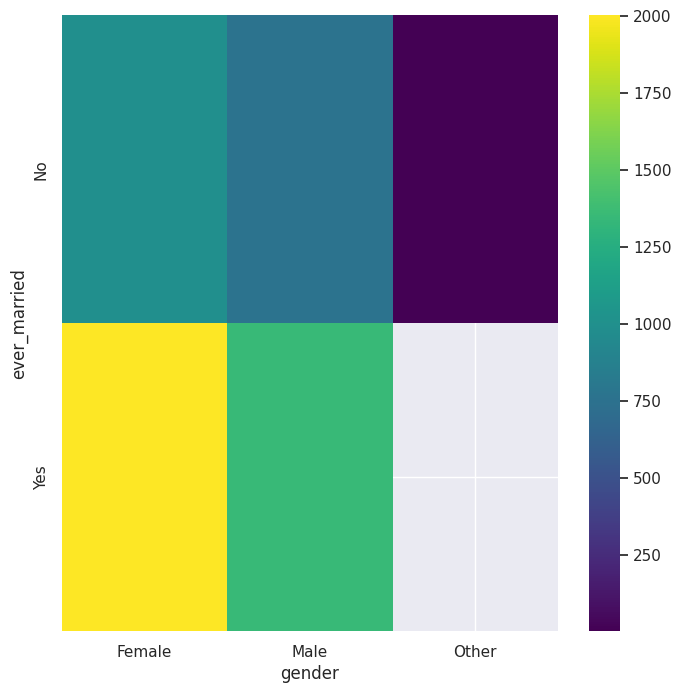

In [338]:
# @title gender vs ever_married

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ever_married'].value_counts()
    for x_label, grp in df.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('ever_married')

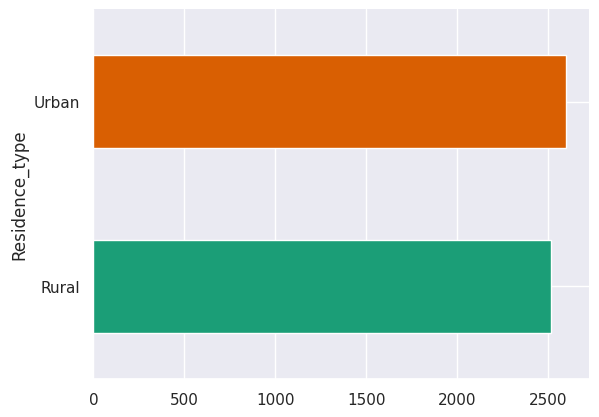

In [339]:
# @title Residence_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Residence_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

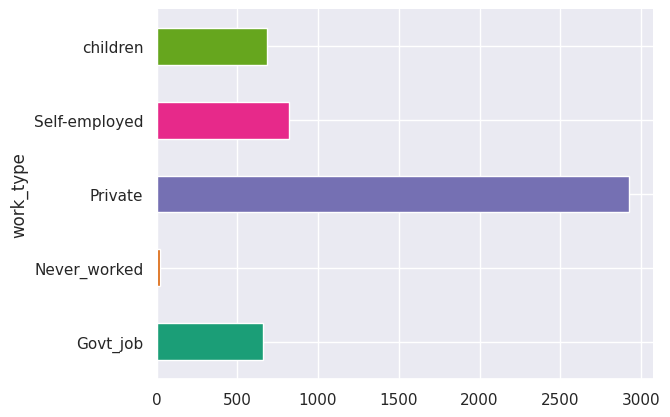

In [340]:
# @title work_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('work_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

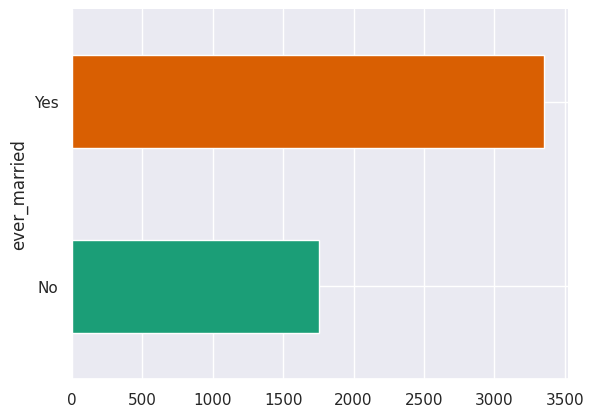

In [341]:
# @title ever_married

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ever_married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

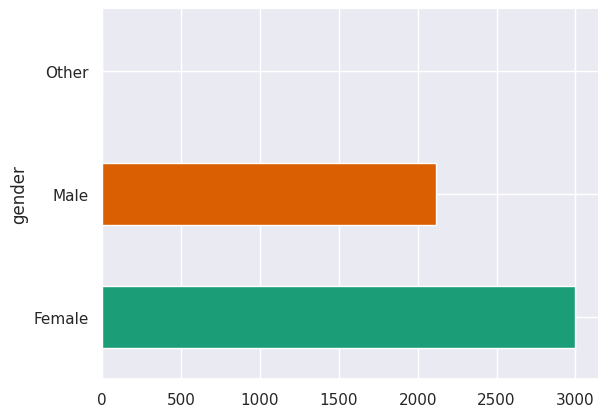

In [342]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

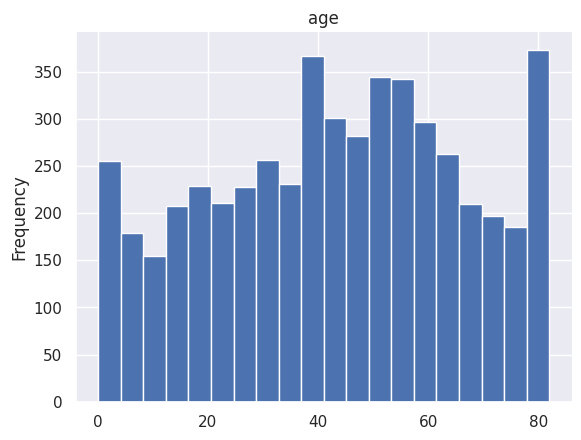

In [343]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

And here's a summary of the dataset as a whole. It shows us the columns, their datatype, and how many values in that column are null (empty/missing data).

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Another useful method is "describe", which shows a summary of the columns from a statistics point of view, i.e. max, min, mean and standard deviation of values.

In [345]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Getting Some Insights from Our Data

First, let's check the percentage of genders:

In [346]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


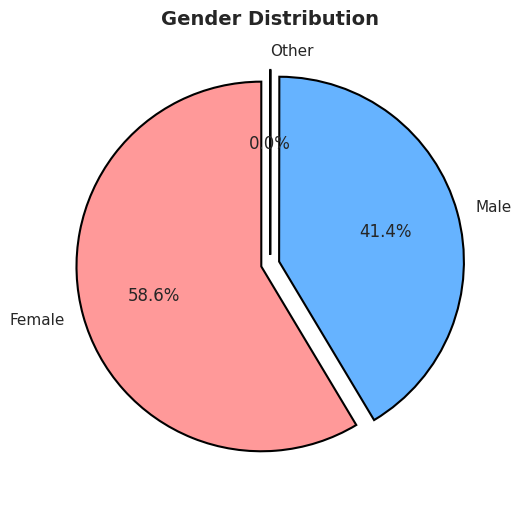

In [347]:
plt.figure(figsize=(10, 6))

# Define custom colors for better aesthetics
colors = ['#ff9999', '#66b3ff']

# Highlight the first slice slightly
n = list(df['gender'].unique())
explode = [0.05] * (len(n))

df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Display percentage values
    startangle=90,  # Rotate for better alignment
    colors=colors,  # Apply custom colors
    explode=explode,  # Add slight separation to first slice
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Enhance edge visibility
)

plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

As you can see, we have 58.6% Female and 41.4% Male and just one 'other' gender that we should find it.

In [348]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Now, we will explore about their ages.

In [349]:
df['age'].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


We have a minimum age of 0.08. I will more explore about this data in data cleaning part. (Maybe Incorrect data)

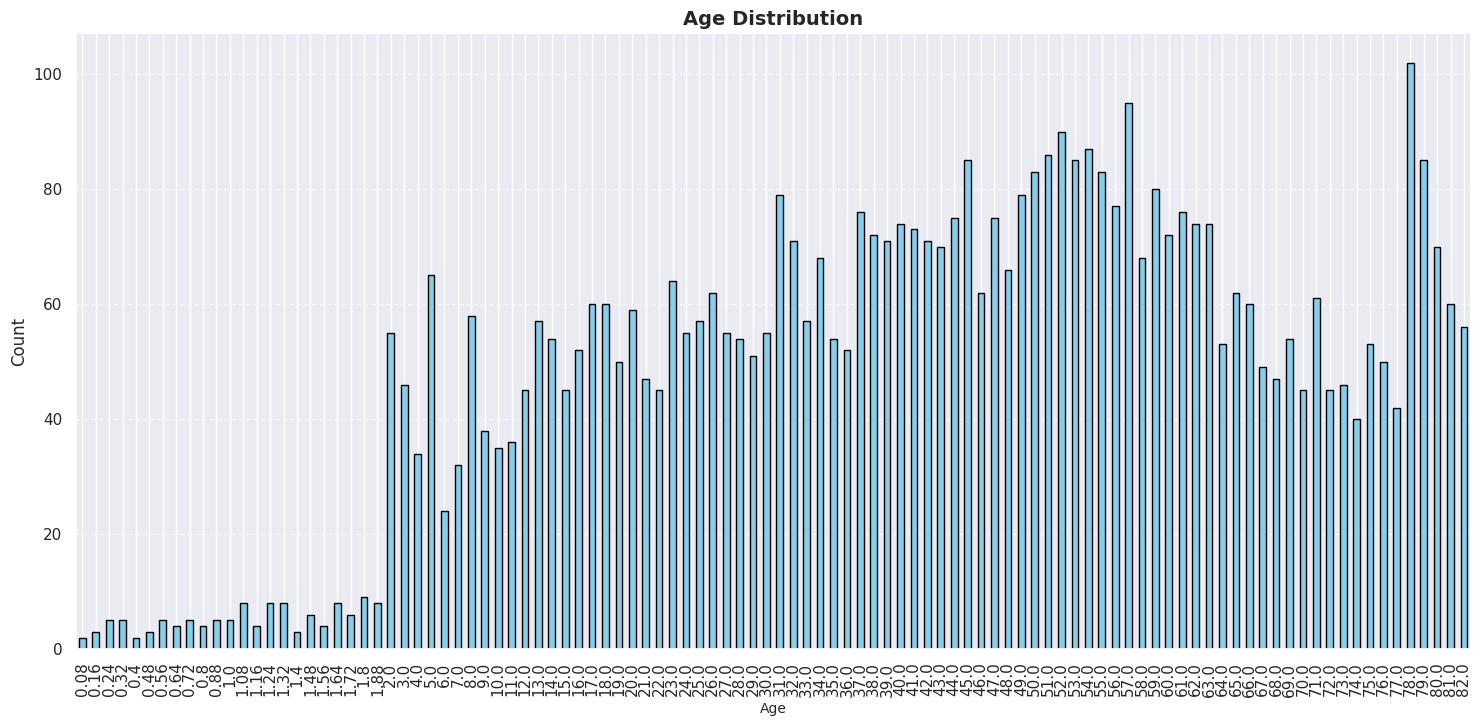

In [350]:
# Count unique age values for better visualization
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(18, 8))

# Create bar chart
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What about the correlation between age and stroke?

<Axes: xlabel='age', ylabel='stroke'>

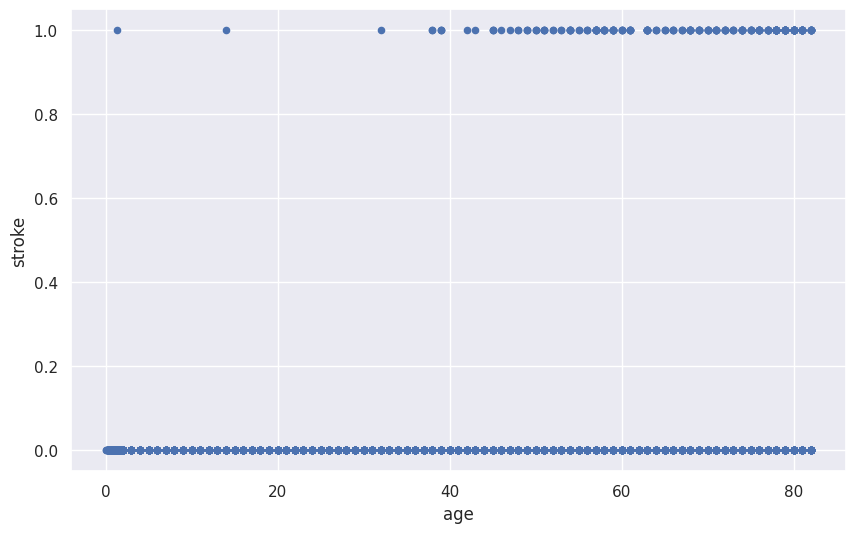

In [351]:
df.plot(kind='scatter', x='age', y='stroke', color='b',figsize=(10, 6))

I am curious about the percentage of strokes in the age of above 50:

In [352]:
# Filter people over 50 years old
over_50 = df[df['age'] > 50]

# Count stroke cases (True values in 'stroke' column)
stroke_count = over_50['stroke'].sum()

# Calculate percentage of strokes in this age group
stroke_percentage = (stroke_count / len(over_50)) * 100

print(f"Percentage of people over 50 who had a stroke: {stroke_percentage:.2f}%")

Percentage of people over 50 who had a stroke: 10.63%



What about the correlation between age and hypertension?

<Axes: xlabel='age', ylabel='hypertension'>

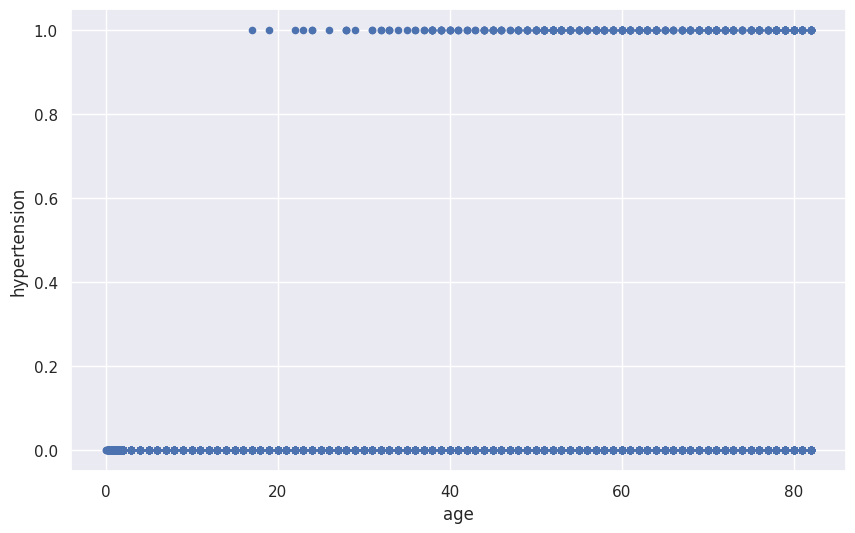

In [353]:
df.plot(kind='scatter', x='age', y='hypertension', color='b',figsize=(10, 6))

Also, I am curious about the percentage of hypertensions in the age of above 50:

In [354]:
# Filter people over 50 years old
over_50 = df[df['age'] > 50]

# Count hypertension cases (True values in 'hypertension' column)
hypertension_count = over_50['hypertension'].sum()

# Calculate percentage of hypertensions in this age group
hypertension_percentage = (hypertension_count / len(over_50)) * 100

print(f"Percentage of people over 50 who had a Hypertension: {hypertension_percentage:.2f}%")

Percentage of people over 50 who had a Hypertension: 18.95%


Aprox 10% of the people have hypertension:

In [355]:
df['hypertension'].value_counts()

,count
hypertension,
0,4612
1,498


What about the correlation between age and heart disease?

<Axes: xlabel='age', ylabel='heart_disease'>

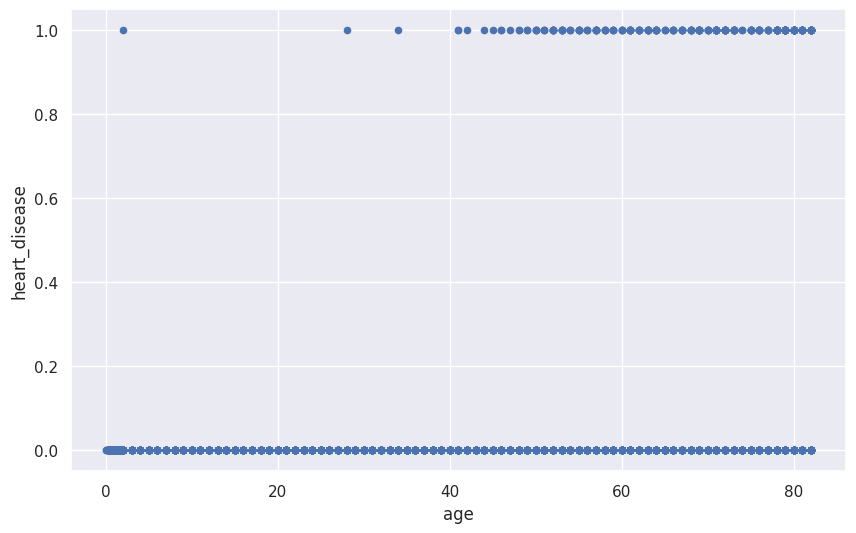

In [356]:
df.plot(kind='scatter', x='age', y='heart_disease', color='b',figsize=(10, 6))

What about the percentage of heart disease in the age of above 50:

In [357]:
# Count hypertension cases (True values in 'heart_disease' column)
heart_disease_count = over_50['heart_disease'].sum()

# Calculate percentage of heart disease in this age group
heart_disease_percentage = (heart_disease_count / len(over_50)) * 100

print(f"Percentage of people over 50 who had a heart disease: {heart_disease_percentage:.2f}%")

Percentage of people over 50 who had a heart disease: 12.08%


Now, let's repeate previouse steps for status of their marriage:

In [358]:
df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


<Axes: xlabel='age', ylabel='ever_married'>

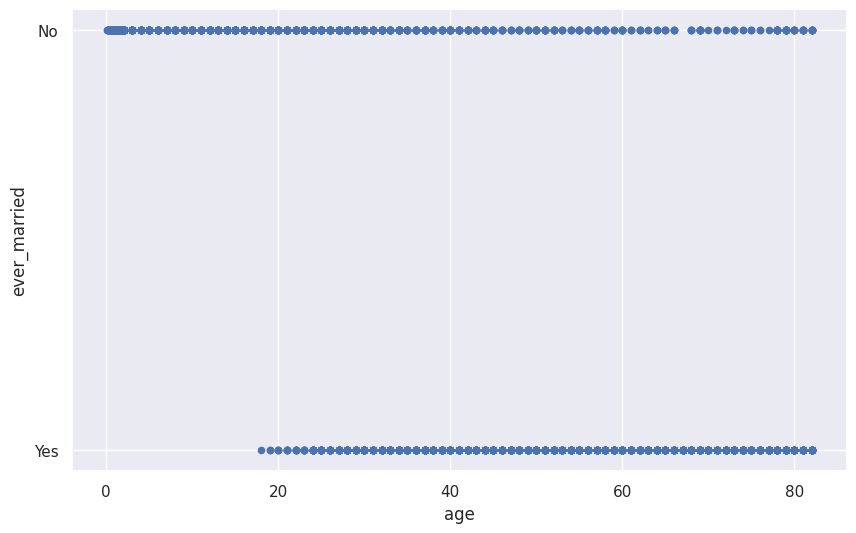

In [359]:
df.plot(kind='scatter', x='age', y='ever_married', color='b',figsize=(10, 6))

I am curious about the minimum age who is married and the maximum age who is not married :)))

In [360]:
df[(df['ever_married'] == 'Yes')]['age'].min()

18.0

In [361]:
df[(df['ever_married'] == 'No')]['age'].max()

82.0

In [362]:
df[(df['age'] == 18) & (df['ever_married'] == 'Yes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1169,39661,Male,18.0,0,0,Yes,Private,Rural,140.52,27.4,never smoked,0


In [363]:
df[(df['age'] == 82) & (df['ever_married'] == 'No')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
337,56357,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0
613,22853,Male,82.0,0,0,No,Self-employed,Rural,106.43,27.0,smokes,0
1042,39120,Female,82.0,0,0,No,Self-employed,Urban,82.21,26.0,never smoked,0
3108,53252,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
3192,47917,Female,82.0,1,0,No,Private,Rural,61.47,22.9,never smoked,0
3603,28247,Male,82.0,0,0,No,Self-employed,Urban,101.57,24.3,smokes,0
4716,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0


Now let's explore the effect of status of marriage in stroke:

In [364]:
df_married = df[df['ever_married'] == 'Yes']
df_not_married = df[df['ever_married'] == 'No']

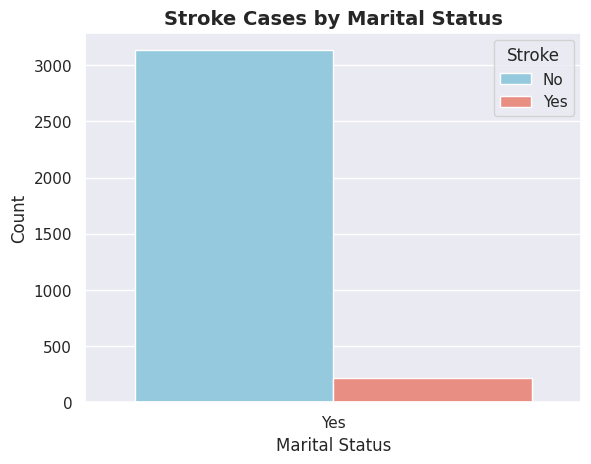

In [365]:
sns.countplot(data=df_married, x='ever_married', hue='stroke', palette=['skyblue', 'salmon'])

# Improve labels and title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stroke Cases by Marital Status', fontsize=14, fontweight='bold')
plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.show()

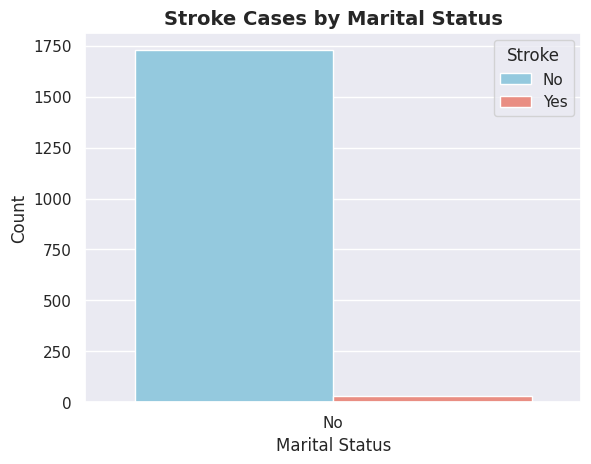

In [366]:
sns.countplot(data=df_not_married, x='ever_married', hue='stroke', palette=['skyblue', 'salmon'])

# Improve labels and title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stroke Cases by Marital Status', fontsize=14, fontweight='bold')
plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.show()

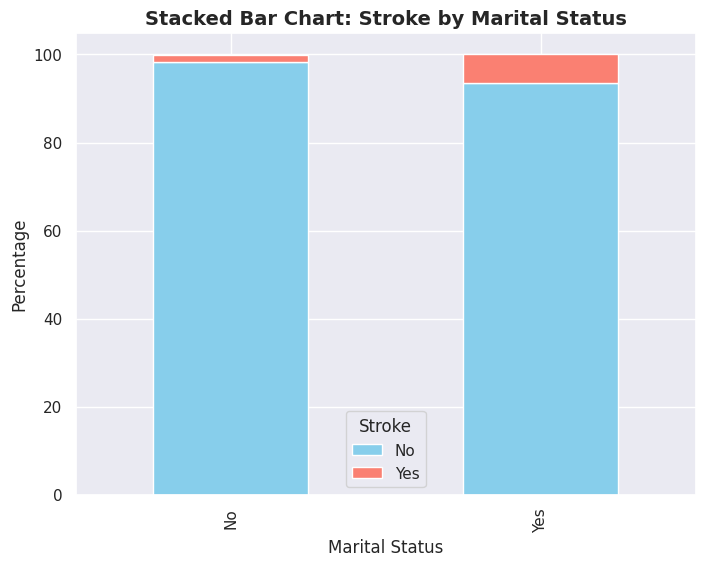

In [367]:
# Count values for each group
married_stroke_counts = df.groupby('ever_married')['stroke'].value_counts().unstack()

# Convert to percentage
married_stroke_percentage = (married_stroke_counts.T / married_stroke_counts.T.sum()).T * 100

# Plot stacked bar chart
married_stroke_percentage.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue', 'salmon'])

# Improve labels and title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Stacked Bar Chart: Stroke by Marital Status', fontsize=14, fontweight='bold')
plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.show()

Now, let's explore 'work_type' column:

In [368]:
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<Axes: ylabel='count'>

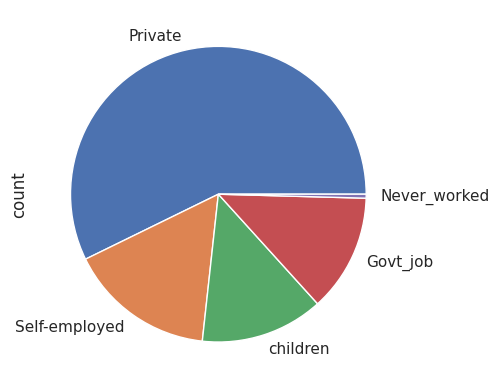

In [369]:
df['work_type'].value_counts().plot.pie()

Approx same number of urban  and rural:

In [370]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


Let's know about the glucose level of people:

In [371]:
df['avg_glucose_level'].describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


The average glucose level (also known as blood glucose level) is a critical measurement for assessing a person's metabolic health. The normal glucose levels can vary based on whether you're fasting, after eating, or during certain health conditions like diabetes.

Generally, 100 mg/dL for fasting blood glucose is considered the borderline between normal and prediabetic levels.

In [372]:
diabetic_people = df[df['avg_glucose_level'] >= 100]
percentage = (diabetic_people.shape[0] / df.shape[0]) * 100
print(f'The percentage of people suspected to have diabetes: {percentage}%')

The percentage of people suspected to have diabetes: 38.7279843444227%


Now, BMI:

In [373]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


**BMI Categories:**
- Underweight: BMI less than 18.5
- Normal weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obesity: BMI of 30 or more

When the mean is 28.89 it seem that the average of these people are overweighted!

<Axes: xlabel='bmi', ylabel='stroke'>

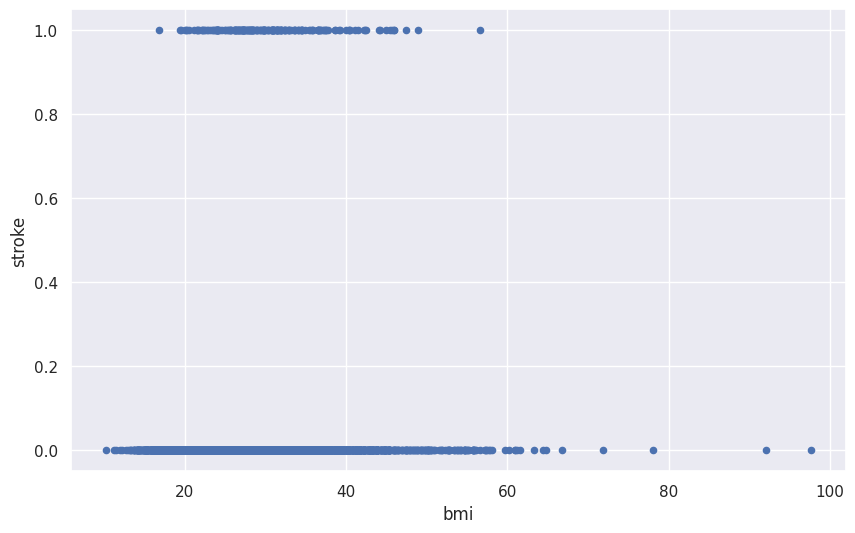

In [374]:
df.plot(kind='scatter', x='bmi', y='stroke', color='b',figsize=(10, 6))

In [375]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [376]:
percentage = df[df['stroke'] == 1].shape[0] / df.shape[0]
print(percentage * 100)

4.87279843444227


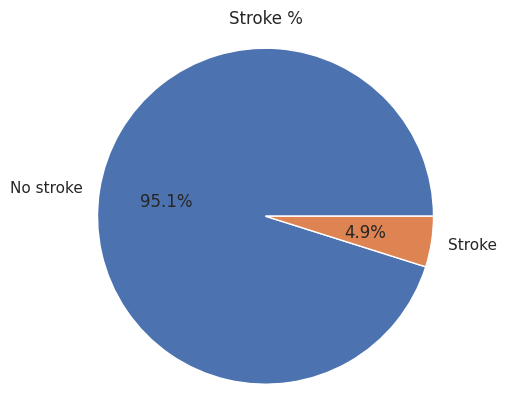

In [377]:
df_stroke = df['stroke'].value_counts()
my_labels = 'No stroke', 'Stroke'
plt.pie(df_stroke, labels = my_labels, autopct= '%1.1f%%')
plt.title('Stroke %')
plt.axis('equal')
plt.show()

Let's find out if there are any null values:

In [378]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [379]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is 4.9%:

In [380]:
len(df[df['bmi'].isna() & df['stroke']==1])

40

To get a general sense, let's use heatmap correlation to see how factors correlate to each other:

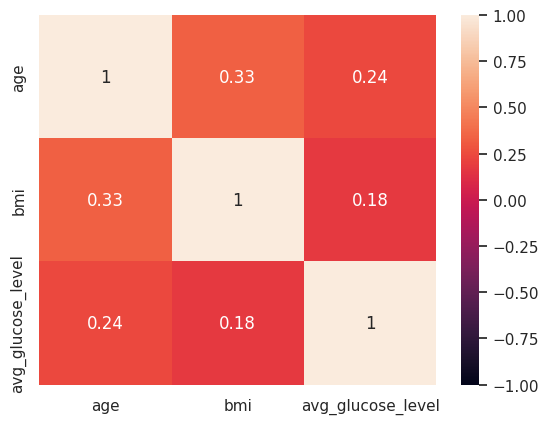

In [381]:
sns.heatmap(df[['age', 'bmi', 'avg_glucose_level']].corr(), vmin= -1, vmax= 1, annot = True)
plt.show()

We see that in general the fields have low correlation with each other. For Stroke, the highest correlation seems to be Age. Next, with Age, BMI field seems to be correlated the highest and then Hypertension and Heart_disease followed by Avg_glucose level. Before we explore these correlated fields further, let's see the distributions of the Numerical fields - Age, BMI, and Avg_glucose_level:

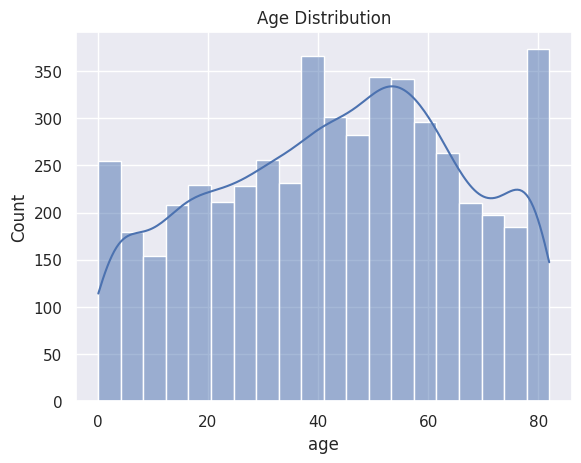

In [382]:
Age_dis = sns.histplot(df['age'], kde = True)
Age_dis.set_title("Age Distribution")
plt.show()

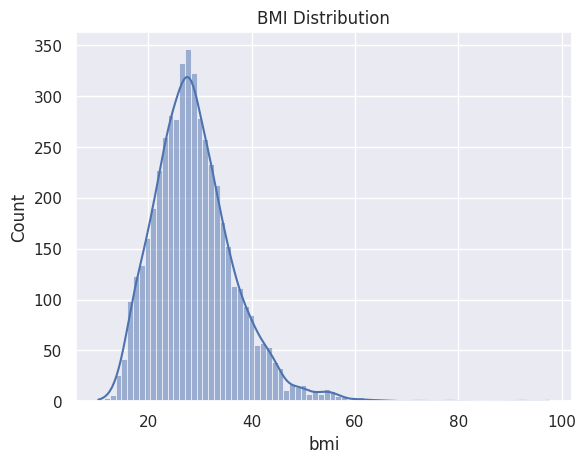

In [383]:
BMI_dis = sns.histplot(df['bmi'], kde = True)
BMI_dis.set_title("BMI Distribution")
plt.show()

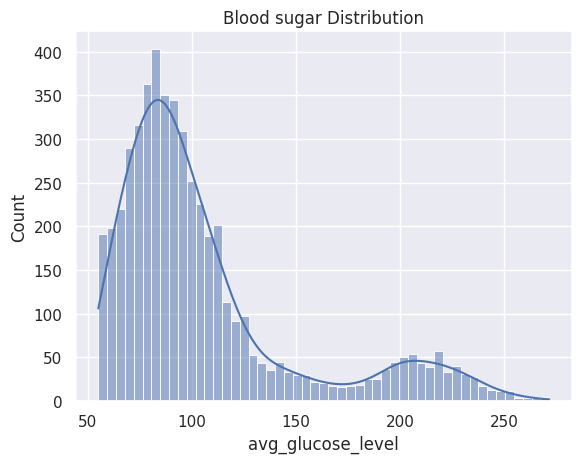

In [384]:
Glucose_dis = sns.histplot(df['avg_glucose_level'], kde = True)
Glucose_dis.set_title("Blood sugar Distribution")
plt.show()

Text(0.5, 1.0, 'Age vs. BMI')

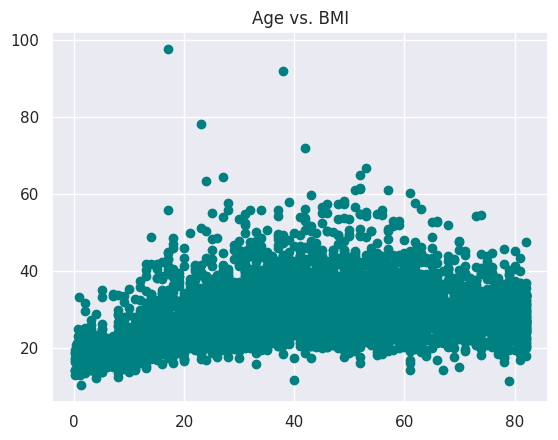

In [385]:
plt.scatter(df['age'], df['bmi'], color='teal')
plt.title('Age vs. BMI')

There's definitely a correlation between age and BMI which supports the heatmap. Past 50 years of age, the BMI trend does seem to go down and this may be due to our bodies starting to get old and smaller in frame.

Text(0.5, 1.0, 'Age vs. Blood sugar')

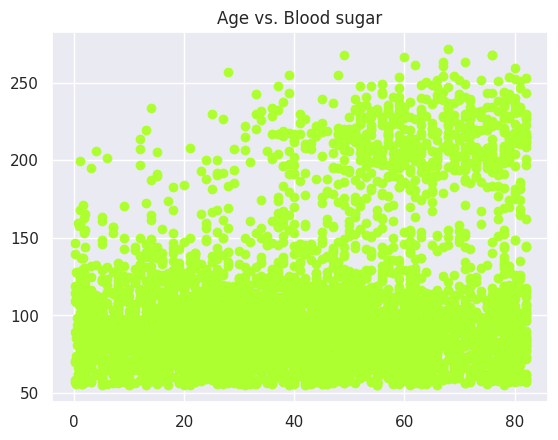

In [386]:
plt.scatter(df['age'], df['avg_glucose_level'], color='greenyellow')
plt.title('Age vs. Blood sugar')

As for Age vs. Blood sugar, there seems to be a very low positive correlation.

In [387]:
def bar_chart(attribute):
    return df.groupby([attribute, 'stroke'])['age'].count().unstack().plot.bar(stacked=True, figsize=(4,4), width=0.5)

def stroke_pct(attribute):
    stroke = df.groupby([attribute, 'stroke'])['age'].count()
    total = df.groupby([attribute])['age'].count()
    stroke_pct = stroke/total * 100
    stroke_pct = stroke_pct.unstack()
    return stroke_pct.plot.bar(stacked=True, figsize=(4,4), width=0.5)

Text(0.5, 1.0, 'Stroke % in Work type')

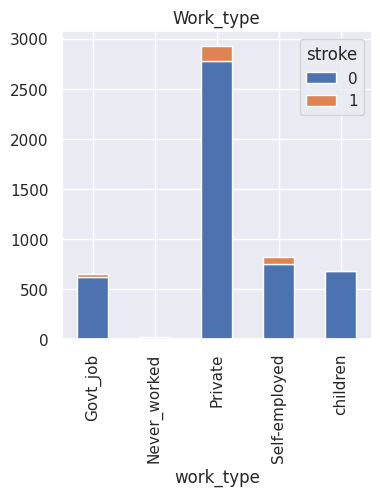

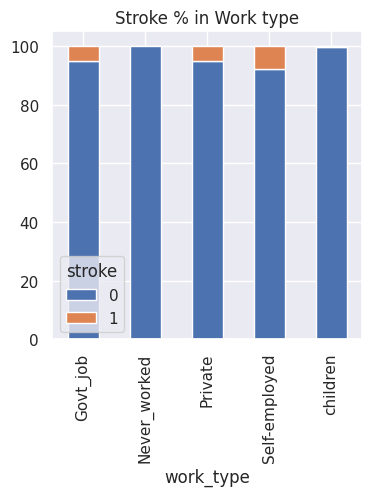

In [388]:
bar_chart('work_type').set_title("Work_type")
stroke_pct('work_type').set_title("Stroke % in Work type")

Text(0.5, 1.0, 'Stroke % among Smoking status')

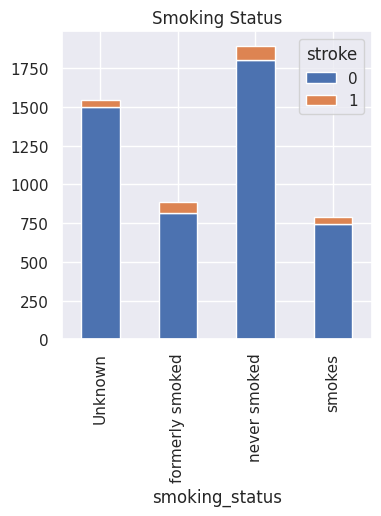

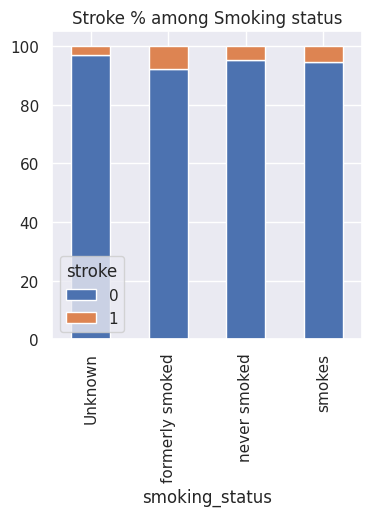

In [389]:
bar_chart('smoking_status').set_title("Smoking Status")
stroke_pct('smoking_status').set_title("Stroke % among Smoking status")

**EDA Insight & Learnings**:

1. Age is a strong driving factor for Stroke risk.
2. Contrary to my assumption, BMI was not correlated to risk of Stroke. This came as a surprise as BMI is used to diagnose obesity which is linked to other risks like heart disease and stroke.
3. Blood sugar was not correlated to stroke risk however, diabetes is a risk for stroke because it raises the risk by 1.5 times if your avg_glucose_level is greater than 200mg/dL reaching the diabetic category and we saw that in this dataset.
4. Sometimes what seems to be a correlation on the surface isn't. For example, attributes like Heart disease, hypertension, ever_married and smoking_status all upon further analysis, pointed to age.

## Data Cleaning

In [390]:
# First take a copy from main df
main_df = df.copy()

In [391]:
main_df.shape

(5110, 12)

Next step would be to clean the data. We will check for **missing values**, possible **invalid data**, **duplicate rows**.

#### Handling Missing Values

In [392]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


As we said, BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is 4.9%:

In [393]:
len(df[df['bmi'].isna() & df['stroke']==1])

40

There are 40 stroke patients among the null BMI values making up 16% of total strokes! so we will NOT remove them and instead maybe will fill in the mean BMI values in order to keep all the stroke counts. Let's first see them:

In [394]:
df[df['bmi'].isna() & df['stroke']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [395]:
id_nan_bmi_list = list(df[df['bmi'].isna() & df['stroke']==1]['id'])

#### As we saw in the class, there are different ways of dealing with missing data:


*   We can Google for missing specs and fill the table with accurate data
*   Estimate the missing data and fill Null values
*   Drop the not so important columns
*   Drop the rows containing missing values.

The first step is obviously the most accurate, but it usually takes time.

We have one children (girl) among these 40 people that should use google for check the bmi for 1-year children.

Baseod on [this](https://cdn.who.int/media/docs/default-source/child-growth/child-growth-standards/indicators/body-mass-index-for-age/cht-bfa-girls-p-0-2.pdf?sfvrsn=16aa7a98_17) and [this](https://cdn.who.int/media/docs/default-source/child-growth/child-growth-standards/indicators/body-mass-index-for-age/cht-bfa-girls-z-0-2.pdf?sfvrsn=3fe76a61_27), I put BMI = 16.5 for this young girl.

In [396]:
df.loc[df['id'] == 69768, 'bmi'] = 16.5
df[df['id'] == 69768]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,16.5,Unknown,1


For other, I put mean of bmi for them.

In [397]:
df.loc[df['bmi'].isna(), 'bmi'] = round(df['bmi'].mean(), 1)

In [398]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [399]:
df[df['id'].isin(id_nan_bmi_list)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,28.9,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,28.9,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,28.9,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,28.9,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,28.9,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,28.9,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,28.9,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,28.9,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,28.9,formerly smoked,1


In [400]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [401]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [402]:
df = df[df['id'] != 56156]

In [403]:
df.shape

(5109, 12)

Now, we do not have any missing values.

#### Invalid Data



This step usually involves checking for unusual patterns in the data. A good starting point would be to go over each column, and see if we can come up with a reasonable range for the values, and then check to see if there are data points out of that range

In [404]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.892347,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.700188,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We can observe that:
* 'id' column: It is not too important and maybe we can drop it.
* 'age' column: It seems ok. maximum is 82 and minimum is 0.08 that maybe it is for a children but we should check it.
* 'hypertension' column: It seems ok. All are boolean between one and zero but we should be sure of that.
* 'heart_disease' column: It seems ok.Like last column.
* 'avg_glucose_level' column: should check the net for its range.
* 'bmi' level: The minimum is 10.3 that is a little low and maybe for a children. But the maximum is too high and maybe it can be an invalid.
* 'stroke' column: Same as other boolean columns.

* Also we have another columns that should explore (Like work_type)

Age Column:

In [405]:
df[df['age'] < 10].shape

(472, 12)

In [406]:
df[(df['age'] < 14) & (df['work_type'] != 'children')].shape

(15, 12)

Oops!, let's look more:

In [407]:
df[(df['age'] < 14) & (df['work_type'] != 'children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,Unknown,0
455,7351,Male,13.0,0,0,No,Private,Urban,92.14,23.2,never smoked,0
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
1063,42821,Female,13.0,0,0,No,Private,Rural,60.69,24.0,smokes,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1809,18179,Male,13.0,0,0,No,Private,Rural,99.44,21.0,never smoked,0
1976,46577,Female,13.0,0,0,No,Private,Urban,77.63,31.7,never smoked,0
2112,9199,Male,13.0,0,0,No,Self-employed,Urban,74.19,31.1,formerly smoked,0
3334,56282,Male,13.0,0,0,No,Private,Rural,90.60,16.9,never smoked,0


For id = 54975 and id = 9199 looks suspicious that a  7-year boy or 13-year boy is a self-employed. Let's explore more for under 18 people:

In [408]:
df[(df['age'] < 14) & (~df['work_type'].isin(['children', 'Private', 'Never_worked']))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,Unknown,0
2112,9199,Male,13.0,0,0,No,Self-employed,Urban,74.19,31.1,formerly smoked,0


Ok. In my opinio these two datas should be dropped because they are not normal.

In [409]:
df.drop(df[(df['age'] < 14) & (~df['work_type'].isin(['children', 'Private', 'Never_worked']))].index, inplace=True)

<ipython-input-409-8b2c8d1f8daf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['age'] < 14) & (~df['work_type'].isin(['children', 'Private', 'Never_worked']))].index, inplace=True)


In [410]:
df[(df['age'] < 14) & (~df['work_type'].isin(['children', 'Private', 'Never_worked']))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Now for older:

In [411]:
df[(df['age'] > 50) & (df['work_type'].isin(['children', 'Never_worked']))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [412]:
df[df['age'] > 30]['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job'], dtype=object)

Now everything about 'age' column is normal.

hypertension, heart_disease, stroke Columns:

In [413]:
df['hypertension'].unique()

array([0, 1])

In [414]:
df['heart_disease'].unique()

array([1, 0])

In [415]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [416]:
df['stroke'].unique()

array([1, 0])

Everything is ok for them. Just for ever_married we can check it woth age column:

In [417]:
df[(df['age'] < 18) & (df['ever_married'] == 'Yes')].shape

(0, 12)

Normal.

work_type Column:

In [418]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [419]:
df['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,817
children,687
Govt_job,657
Never_worked,22


Normal.

Residence_type Column:

In [420]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2595
Rural,2512


avg_glucose_level Column:

According to experts here are some range of blood sugar:
A amount less than 50mg/dL means blood sugar is critically low and requires immediate treatment.
- 51-70 means blood sugar is below normal levels and requires treatment.
- 71-90 means blood sugar should be monitored and treated as necessary.
- 90-180 means Healthy range.
- 180-250 means above normal levels.
- Higher than 250 means very high and requires immediate treatment

In [421]:
df['avg_glucose_level'].describe()

,avg_glucose_level
count,5107.000000
mean,106.154895
std,45.287834
min,55.120000
25%,77.270000
50%,91.890000
75%,114.090000
max,271.740000


In [422]:
df[df['avg_glucose_level'] >= 180].shape[0]/len(df)*100

11.415703935774427

The people who have higher than 180mg/dL blood sugar makes up 11 % of total dataset.

In [423]:
high_glucose = df[df['avg_glucose_level'] >= 180]
high_glucose[high_glucose['stroke'] == 1].shape[0] / len(df[df['stroke'] == 1]) * 100

31.72690763052209

Those 11% of people who have higher than 180mg/DL account for 32% of all strokes.

In [424]:
df[df['avg_glucose_level'] > 250]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
33,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
122,13491,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1
135,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
193,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
220,20463,Male,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1
386,63732,Male,70.0,1,0,Yes,Self-employed,Urban,251.60,27.1,never smoked,0
755,33585,Female,64.0,0,0,Yes,Private,Rural,250.20,27.4,Unknown,0
785,17813,Female,69.0,0,1,Yes,Private,Rural,254.60,21.7,Unknown,0
1067,55862,Male,67.0,1,1,Yes,Private,Rural,254.63,31.0,never smoked,0
1113,38678,Female,66.0,0,0,Yes,Self-employed,Rural,251.46,35.2,smokes,0


Seems normal.

bmi Column:

In [425]:
df['bmi'].describe()

,bmi
count,5107.000000
mean,28.893871
std,7.700364
min,10.300000
25%,23.800000
50%,28.400000
75%,32.800000
max,97.600000


- Underweight. Less than 18.5.
- Healthy Weight. 18.5 to less than 25.
- Overweight. 25 to less than 30.
- Obesity. 30 or greater.
- Class 1 Obesity. 30 to less than 35.
- Class 2 Obesity. 35 to less than 40.
- Class 3 Obesity. (Severe Obesity) 40 or greater.

We have some suspicious data here!

In [426]:
df[df['bmi'] > 60].shape

(13, 12)

In [427]:
df[df['bmi'] > 60]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,65895,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,72784,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


In [428]:
df[df['bmi'] < 12].shape

(3, 12)

In [429]:
df[df['bmi'] < 12]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
2187,59993,Male,40.00,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0
3307,3205,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0


<Axes: >

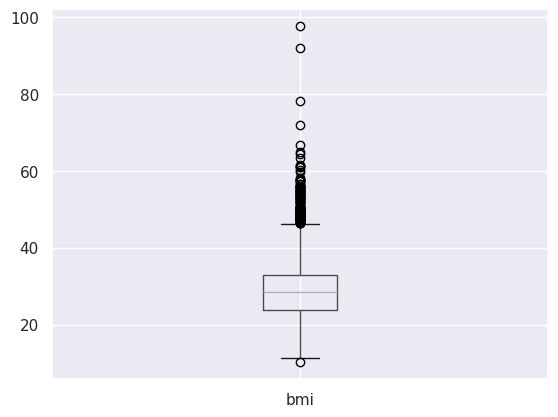

In [430]:
df.boxplot(column=['bmi'])

We have some outlier data that we can drop them:

In [431]:
df = df[~((df['bmi'] > 70) | (df['bmi'] < 11))]

In [432]:
df['bmi'].describe()

,bmi
count,5102.000000
mean,28.853626
std,7.532788
min,11.300000
25%,23.800000
50%,28.400000
75%,32.800000
max,66.800000


smoking_status Column:

In [433]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1890
Unknown,1541
formerly smoked,883
smokes,788


In [434]:
df[df['smoking_status'] == 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.9,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.9,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,28.9,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [435]:
df[df['smoking_status'] == 'Unknown'].shape[0] / df.shape[0]

0.30203841630733047

So, we won't remove 'Unknown' rows. But actually for children we can guess that the data should be 'never smoked' with probability of higher than 90%.

In [436]:
df[(df['smoking_status'] == 'Unknown') & (df['work_type'] == 'children')].shape

(617, 12)

 A lot of rows!

In [437]:
df[(df['smoking_status'] == 'Unknown') & (df['work_type'] == 'children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,16.5,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


Absoloutly a children with age under 10, is in never smoked type.(High probability)

In [438]:
df.loc[(df['smoking_status'] == 'Unknown') & (df['work_type'] == 'children') & (df['age'] < 10), 'smoking_status'] = 'never smoked'

In [439]:
df[(df['smoking_status'] == 'Unknown') & (df['work_type'] == 'children')].shape

(148, 12)

In [440]:
df[(df['smoking_status'] == 'Unknown') & (df['work_type'] == 'children')]['age'].describe()

,age
count,148.000000
mean,12.466216
std,1.755131
min,10.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,16.000000


THe minimum is 10 and maximum is 16. I will not change the data for them but I hope all of them are in 'never smoked' category :))))).

This step is complete.

In [441]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000
mean,36514.664249,43.261615,0.097021,0.054096,106.156788,28.853626,0.048804
std,21162.468087,22.606894,0.296015,0.226230,45.273566,7.532788,0.215480
min,67.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.290000,23.800000,0.000000
50%,36905.000000,45.000000,0.000000,0.000000,91.890000,28.400000,0.000000
75%,54637.250000,61.000000,0.000000,0.000000,114.080000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,66.800000,1.000000


## Dealing with duplicate data

First, we check to see if there are any duplicate rows.

In [442]:
df[df.duplicated()].shape

(0, 12)

We do not have any duplicated data. So, this step is complete too.

## Data Preprocessing

Next step in preparing our data would be to make all columns have numerical values, so that the machine learning algorithms are capable of reading and analyzing the data later.

This means that we have to convert columns with values of the following types to numbers:

- Categorical, e.g. vehicle types or sizes
- Date
- Boolean
- Text

In [443]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [444]:
df.select_dtypes(include = "object").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

For columns that have a lot of unique values, we use the Categorical encoding. For other columns that contain unique values have a limited range, we follow the One-hot-encoding. The main reason is not to increase the number of columns in our dataset too much (as one-hot-encoding creates new columns). But overall, both approaches can be used.

For 'gender', 'ever_married', 'Residence_type' we use one-hot coding.

For 'work_type' and 'smoking_status' we use categorical encoding.

#### Categorical Encoding

In [445]:
to_categorical_columns = ['work_type','smoking_status']
for column in to_categorical_columns:
  df[column] = df[column].astype('category').cat.codes
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,2,Urban,228.69,36.6,1,1
1,51676,Female,61.0,0,0,Yes,3,Rural,202.21,28.9,2,1
2,31112,Male,80.0,0,1,Yes,2,Rural,105.92,32.5,2,1
3,60182,Female,49.0,0,0,Yes,2,Urban,171.23,34.4,3,1
4,1665,Female,79.0,1,0,Yes,3,Rural,174.12,24.0,2,1


In [446]:
df[column].astype('category').cat.codes

,0
0,1
1,2
2,2
3,3
4,2
...,...
5105,2
5106,2
5107,2
5108,1


#### One-hot-encoding

In [447]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,int8
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [448]:
to_one_hot_columns = df.select_dtypes(include = "object").columns
for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column], dtype=int)  # Convert to int explicitly
    df = df.drop(columns=[column])  # Drop original categorical column
    df = pd.concat([df, encoded_df], axis=1)  # Concatenate one-hot encoded columns
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes,Rural,Urban
0,9046,67.0,0,1,2,228.69,36.6,1,1,0,1,0,1,0,1
1,51676,61.0,0,0,3,202.21,28.9,2,1,1,0,0,1,1,0
2,31112,80.0,0,1,2,105.92,32.5,2,1,0,1,0,1,1,0
3,60182,49.0,0,0,2,171.23,34.4,3,1,1,0,0,1,0,1
4,1665,79.0,1,0,3,174.12,24.0,2,1,1,0,0,1,1,0


In [449]:
df.shape

(5102, 15)

As can be seen, we have several new columns now, which correspond to the one-hot-encoded columns.

Now we drop all non-numerical columns (as we have encoded them) and check to make sure our data is all numeric.

In [450]:
non_numeric_columns = df.select_dtypes(include = "object").columns
df.drop(non_numeric_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5102 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5102 non-null   int64  
 1   age                5102 non-null   float64
 2   hypertension       5102 non-null   int64  
 3   heart_disease      5102 non-null   int64  
 4   work_type          5102 non-null   int8   
 5   avg_glucose_level  5102 non-null   float64
 6   bmi                5102 non-null   float64
 7   smoking_status     5102 non-null   int8   
 8   stroke             5102 non-null   int64  
 9   Female             5102 non-null   int64  
 10  Male               5102 non-null   int64  
 11  No                 5102 non-null   int64  
 12  Yes                5102 non-null   int64  
 13  Rural              5102 non-null   int64  
 14  Urban              5102 non-null   int64  
dtypes: float64(3), int64(10), int8(2)
memory usage: 568.0 KB


## Normalization/Stadardization

Our next step would be to "normalize" all the columns. This means we need to make sure that all columns have a **"similar"** range.

There are several ways of accomplishing this step. Two of the most popular options are:

- SatandardScaler: converts the data in a column so that it has a 0-mean and standard deviation of 1
- MinMaxScaler: simply scales the data in a column so that maximim value is 1 and the minimum value is 0

Note that we don't need scaling on the newly added one-hot-encoded columns, as the values are between 0 and 1 by definition.

In [451]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes,Rural,Urban
0,9046,67.0,0,1,2,228.69,36.6,1,1,0,1,0,1,0,1
1,51676,61.0,0,0,3,202.21,28.9,2,1,1,0,0,1,1,0
2,31112,80.0,0,1,2,105.92,32.5,2,1,0,1,0,1,1,0
3,60182,49.0,0,0,2,171.23,34.4,3,1,1,0,0,1,0,1
4,1665,79.0,1,0,3,174.12,24.0,2,1,1,0,0,1,1,0


In [452]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = ['age','work_type','avg_glucose_level']      # Specify the columns to standard scale
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,age,work_type,avg_glucose_level
count,5.102000e+03,5.102000e+03,5.102000e+03
mean,-1.225554e-16,-6.267037e-17,2.339694e-16
std,1.000098e+00,1.000098e+00,1.000098e+00
min,-1.910296e+00,-1.987149e+00,-1.127408e+00
25%,-8.078688e-01,-1.533000e-01,-6.376705e-01
50%,7.690377e-02,-1.533000e-01,-3.151549e-01
75%,7.847219e-01,7.636245e-01,1.750246e-01
max,1.713733e+00,1.680549e+00,3.657751e+00


As we see in the above summary, the mean of all selected columns are 0 and the satndard deviation is 1.

Now let's move to MinMax scaling for the other set of columns.

In [453]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

minmax_scaling_columns = ['bmi', 'smoking_status']    # Specify the columns to scale using the min/max method
df[minmax_scaling_columns] = scaler.fit_transform(df[minmax_scaling_columns])
df[minmax_scaling_columns].describe()

,bmi,smoking_status
count,5102.000000,5102.000000
mean,0.316282,0.520384
std,0.135726,0.329238
min,0.000000,0.000000
25%,0.225225,0.333333
50%,0.308108,0.666667
75%,0.387387,0.666667
max,1.000000,1.000000


In [454]:
df.describe()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes,Rural,Urban
count,5102.000000,5.102000e+03,5102.000000,5102.000000,5.102000e+03,5.102000e+03,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000
mean,36514.664249,-1.225554e-16,0.097021,0.054096,-6.267037e-17,2.339694e-16,0.316282,0.520384,0.048804,0.586437,0.413563,0.343199,0.656801,0.491572,0.508428
std,21162.468087,1.000098e+00,0.296015,0.226230,1.000098e+00,1.000098e+00,0.135726,0.329238,0.215480,0.492520,0.492520,0.474824,0.474824,0.499978,0.499978
min,67.000000,-1.910296e+00,0.000000,0.000000,-1.987149e+00,-1.127408e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,-8.078688e-01,0.000000,0.000000,-1.533000e-01,-6.376705e-01,0.225225,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36905.000000,7.690377e-02,0.000000,0.000000,-1.533000e-01,-3.151549e-01,0.308108,0.666667,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,54637.250000,7.847219e-01,0.000000,0.000000,7.636245e-01,1.750246e-01,0.387387,0.666667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72940.000000,1.713733e+00,1.000000,1.000000,1.680549e+00,3.657751e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Analysis

In [455]:
df.corr()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes,Rural,Urban
id,1.000000,0.003912,0.002365,-0.001261,-0.015703,0.002058,0.001786,0.007769,0.006427,-0.002085,0.002085,-0.014326,0.014326,0.000832,-0.000832
age,0.003912,1.000000,0.278461,0.263711,-0.361205,0.238043,0.336610,-0.033988,0.245171,0.027231,-0.027231,-0.678640,0.678640,-0.013506,0.013506
hypertension,0.002365,0.278461,1.000000,0.108964,-0.051464,0.176969,0.150133,0.059158,0.128598,-0.020554,0.020554,-0.165813,0.165813,0.007513,-0.007513
heart_disease,-0.001261,0.263711,0.108964,1.000000,-0.027922,0.161979,0.041068,0.009758,0.134841,-0.085959,0.085959,-0.114469,0.114469,-0.002901,0.002901
work_type,-0.015703,-0.361205,-0.051464,-0.027922,1.000000,-0.050447,-0.305089,-0.018682,-0.032222,-0.056649,0.056649,0.352509,-0.352509,0.007078,-0.007078
avg_glucose_level,0.002058,0.238043,0.176969,0.161979,-0.050447,1.000000,0.175124,0.016522,0.132038,-0.055072,0.055072,-0.154633,0.154633,0.004570,-0.004570
bmi,0.001786,0.336610,0.150133,0.041068,-0.305089,0.175124,1.000000,0.001353,0.039560,0.030439,-0.030439,-0.345273,0.345273,-0.001946,0.001946
smoking_status,0.007769,-0.033988,0.059158,0.009758,-0.018682,0.016522,0.001353,1.000000,-0.009881,0.022177,-0.022177,-0.023650,0.023650,-0.014041,0.014041
stroke,0.006427,0.245171,0.128598,0.134841,-0.032222,0.132038,0.039560,-0.009881,1.000000,-0.009278,0.009278,-0.108173,0.108173,-0.015288,0.015288
Female,-0.002085,0.027231,-0.020554,-0.085959,-0.056649,-0.055072,0.030439,0.022177,-0.009278,1.000000,-1.000000,-0.030053,0.030053,-0.005400,0.005400


In [456]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes,Rural,Urban
id,1.000000,0.003912,0.002365,-0.001261,-0.015703,0.002058,0.001786,0.007769,0.006427,-0.002085,0.002085,-0.014326,0.014326,0.000832,-0.000832
age,0.003912,1.000000,0.278461,0.263711,-0.361205,0.238043,0.336610,-0.033988,0.245171,0.027231,-0.027231,-0.678640,0.678640,-0.013506,0.013506
hypertension,0.002365,0.278461,1.000000,0.108964,-0.051464,0.176969,0.150133,0.059158,0.128598,-0.020554,0.020554,-0.165813,0.165813,0.007513,-0.007513
heart_disease,-0.001261,0.263711,0.108964,1.000000,-0.027922,0.161979,0.041068,0.009758,0.134841,-0.085959,0.085959,-0.114469,0.114469,-0.002901,0.002901
work_type,-0.015703,-0.361205,-0.051464,-0.027922,1.000000,-0.050447,-0.305089,-0.018682,-0.032222,-0.056649,0.056649,0.352509,-0.352509,0.007078,-0.007078
avg_glucose_level,0.002058,0.238043,0.176969,0.161979,-0.050447,1.000000,0.175124,0.016522,0.132038,-0.055072,0.055072,-0.154633,0.154633,0.004570,-0.004570
bmi,0.001786,0.336610,0.150133,0.041068,-0.305089,0.175124,1.000000,0.001353,0.039560,0.030439,-0.030439,-0.345273,0.345273,-0.001946,0.001946
smoking_status,0.007769,-0.033988,0.059158,0.009758,-0.018682,0.016522,0.001353,1.000000,-0.009881,0.022177,-0.022177,-0.023650,0.023650,-0.014041,0.014041
stroke,0.006427,0.245171,0.128598,0.134841,-0.032222,0.132038,0.039560,-0.009881,1.000000,-0.009278,0.009278,-0.108173,0.108173,-0.015288,0.015288
Female,-0.002085,0.027231,-0.020554,-0.085959,-0.056649,-0.055072,0.030439,0.022177,-0.009278,1.000000,-1.000000,-0.030053,0.030053,-0.005400,0.005400
